# Hands-On NLP
## Class 1

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

Group members:
* Carlos Cuevas Villarmín
* Javier Alejandro Lopetegui González
* José Felipe Espinosa Orjuela

In [68]:
import re
import unicodedata
from collections import Counter
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [69]:
tqdm.pandas()

nltk.download("punkt")

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to /home/carlos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [71]:
DATA = Path("./data")

TEXT_P = DATA / "texts"

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

In [72]:
TEXT_P.mkdir(exist_ok=True)

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [73]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [74]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [75]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nWhere did this story about stars being p...
woodworking,2461,6729416,Q:\n\nTool recommendation to prick bamboo node...
robotics,2981,7254006,Q:\n\nControlling a conveyor belt with a time ...
hsm,2329,7364214,"Q:\n\nWhen did Mathematics stop being one of ""..."
health,3412,9148631,Q:\n\nWhy doesn't the heart always pump at max...
portuguese,1840,4415251,"Q:\n\nQual a tradução correta de ""shipping add..."


In [76]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Where did this story about stars being part of a board game c
*** woodworking ***
Q:

Tool recommendation to prick bamboo nodes

I am looking for s
*** robotics ***
Q:

Controlling a conveyor belt with a time based motor

I have s
*** hsm ***
Q:

When did Mathematics stop being one of "the Sciences"?

If yo
*** health ***
Q:

Why doesn't the heart always pump at max speed?

I was thinki
*** portuguese ***
Q:

Qual a tradução correta de "shipping address" e "billing addr


# Visualizing the corpus

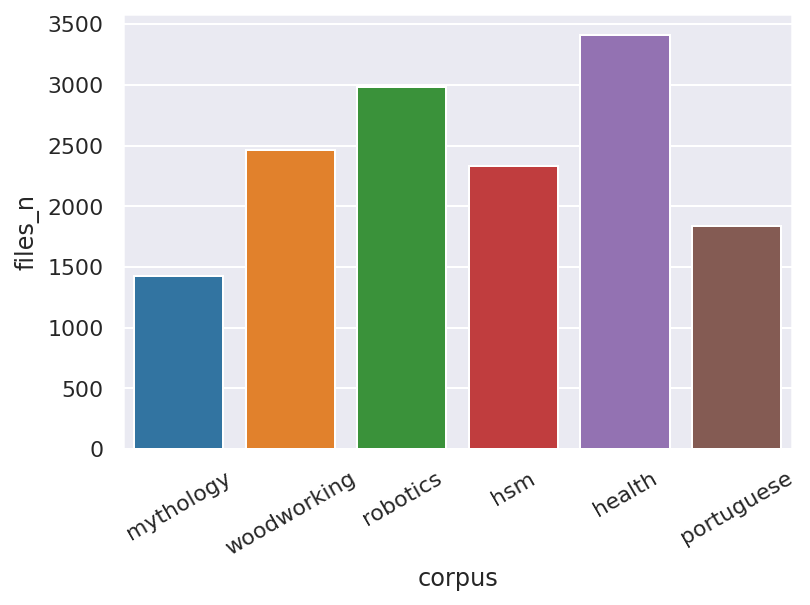

In [77]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

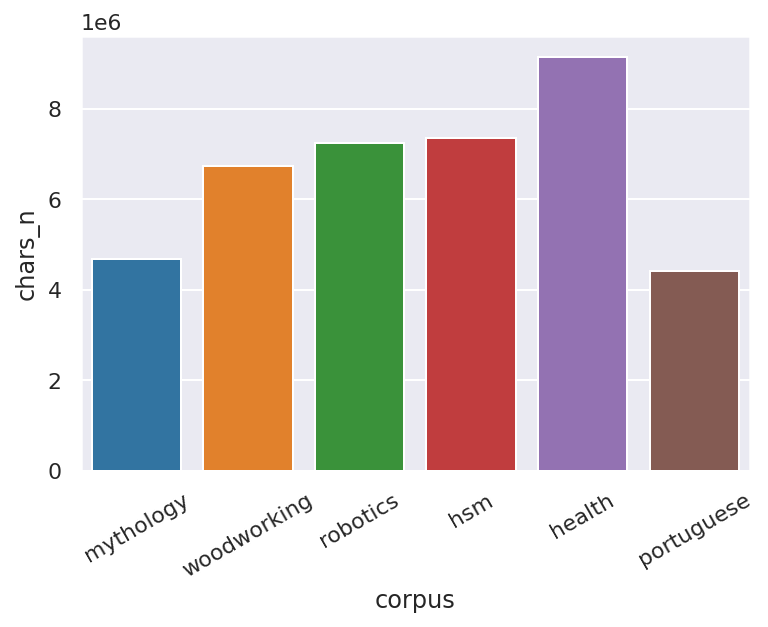

In [78]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

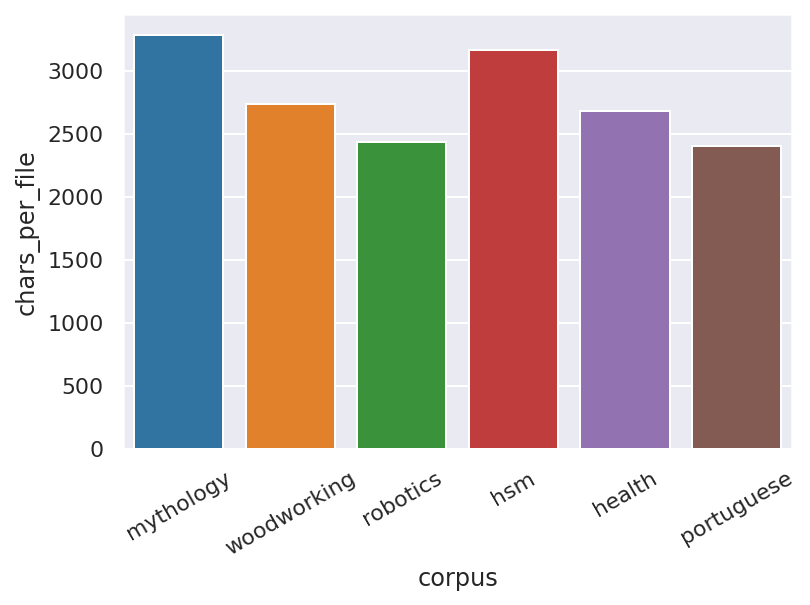

In [79]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [80]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [81]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nWhere did this story about stars being p...,3283.83,1684
woodworking,2461,6729416,Q:\n\nTool recommendation to prick bamboo node...,2734.42,159
robotics,2981,7254006,Q:\n\nControlling a conveyor belt with a time ...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen did Mathematics stop being one of ""...",3161.96,524
health,3412,9148631,Q:\n\nWhy doesn't the heart always pump at max...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a tradução correta de ""shipping add...",2399.59,437


### Note:
- space
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [82]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c":
    print(unicodedata.category(ch), ":::", unicodedata.name(ch))

Ll ::: LATIN SMALL LETTER E WITH BREVE
Lu ::: LATIN CAPITAL LETTER L WITH STROKE
Lo ::: CJK UNIFIED IDEOGRAPH-8336
Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
Mc ::: DEVANAGARI VOWEL SIGN II
Lo ::: HIRAGANA LETTER GA
Sc ::: EURO SIGN
Po ::: COMMA
Po ::: EXCLAMATION MARK
Sm ::: MUCH GREATER-THAN
So ::: BLACK SQUARE
So ::: WHITE HEAVY CHECK MARK
So ::: HUGGING FACE
Cf ::: ZERO WIDTH NON-JOINER


In [83]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
鷹,1
信,1
司,1


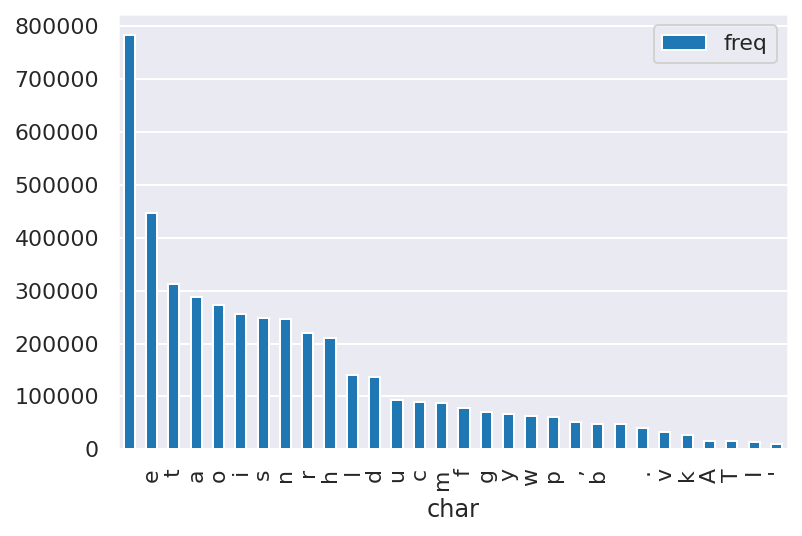

In [84]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

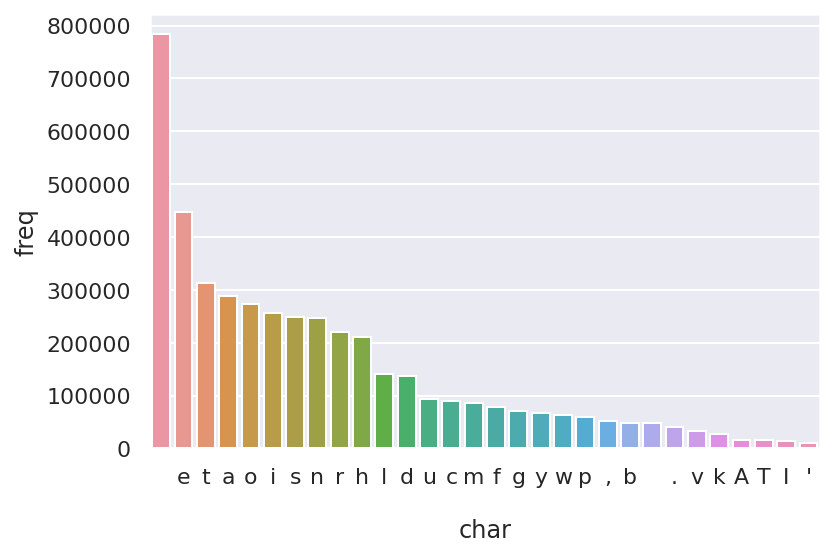

In [85]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24799 (\N{CJK UNIFIED IDEOGRAPH-60DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


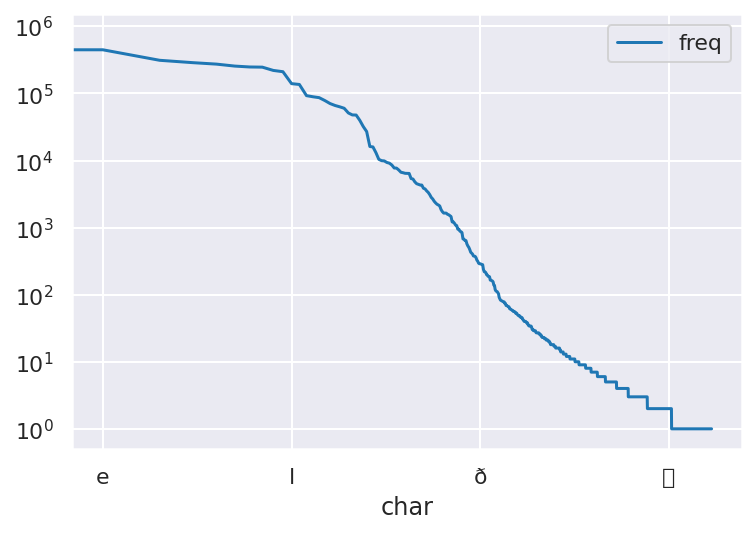

In [86]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [87]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nWhere did this story about stars being p...,3283.83,1684
woodworking,2461,6729416,Q:\n\nTool recommendation to prick bamboo node...,2734.42,159
robotics,2981,7254006,Q:\n\nControlling a conveyor belt with a time ...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen did Mathematics stop being one of ""...",3161.96,524
health,3412,9148631,Q:\n\nWhy doesn't the heart always pump at max...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a tradução correta de ""shipping add...",2399.59,437


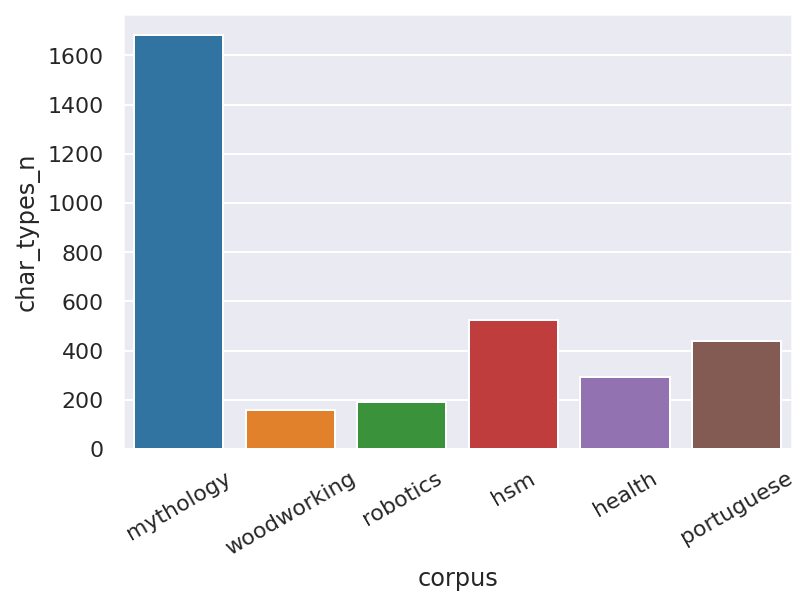

In [88]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### how to compute richness in characters?

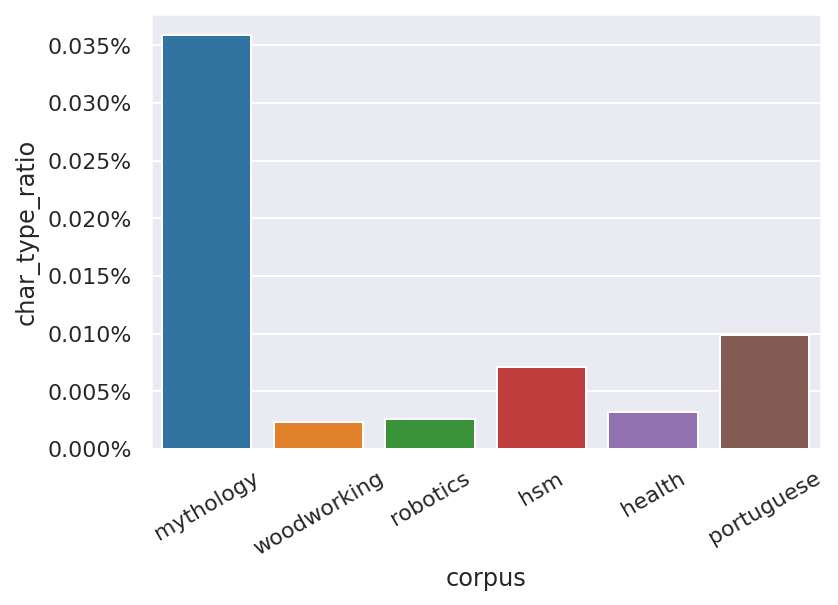

In [89]:
df["char_type_ratio"] = df.char_types_n / df.chars_n
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

In [90]:
char_counters = df.text.map(lambda x: Counter(x[:1000]))
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 160, 'e': 104, 't': 88, 'a': 78, 's': 58, 'i': 54, 'n': 50, 'r': 43, 'o': 42, 'h': 41, 'd': 27, 'm': 23, 'u': 22, 'c': 21, 'y': 19, 'l': 18, 'g': 17, 'f': 17, '\n': 16, 'p': 15, 'w': 11, 'b': 10, 'x': 8, 'v': 8, "'": 6, 'k': 5, '?': 4, 'I': 4, ',': 4, '.': 4, '-': 4, ':': 3, 'W': 2, 'z': 2, 'A': 2, 'T': 2, 'Q': 1, 'D': 1, 'j': 1, 'H': 1, 'E': 1, '[': 1, ']': 1, 'q': 1})


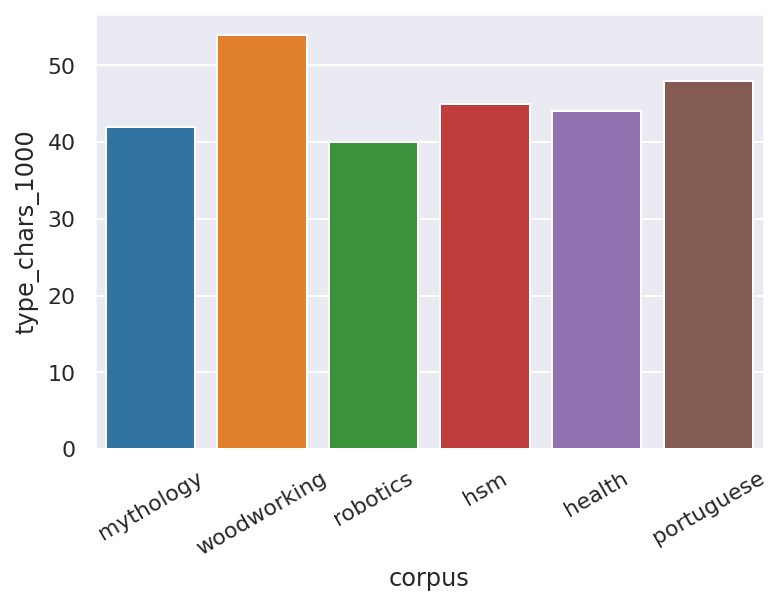

In [91]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [92]:
HOP = 100_000

In [93]:
def batch_counts(text, max_len, hop):
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i]))
    return [len(cntr) for cntr in counters]

In [94]:
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nWhere did this story about stars being p...,3283.83,1684,3.59e-04,42
woodworking,2461,6729416,Q:\n\nTool recommendation to prick bamboo node...,2734.42,159,2.36e-05,54
robotics,2981,7254006,Q:\n\nControlling a conveyor belt with a time ...,2433.41,189,2.61e-05,40
hsm,2329,7364214,"Q:\n\nWhen did Mathematics stop being one of ""...",3161.96,524,7.12e-05,45
health,3412,9148631,Q:\n\nWhy doesn't the heart always pump at max...,2681.31,291,3.18e-05,44
portuguese,1840,4415251,"Q:\n\nQual a tradução correta de ""shipping add...",2399.59,437,9.90e-05,48


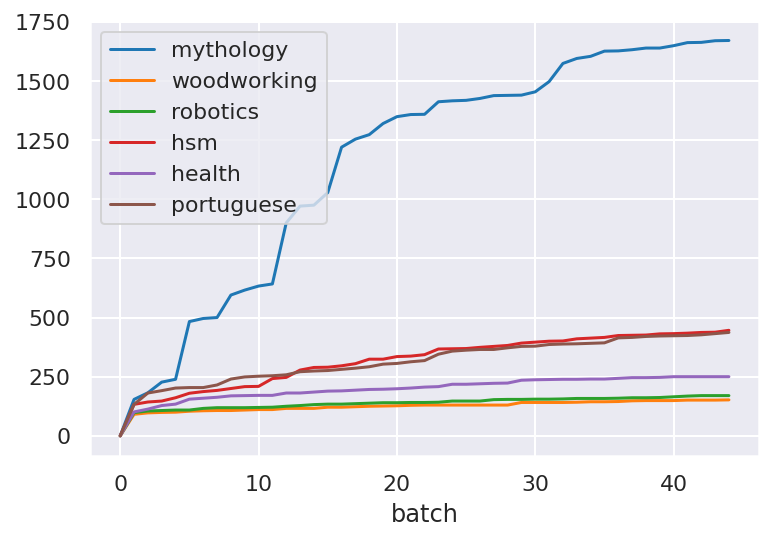

In [95]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

### What's happening here?

#### 🚧 TODO
As we increase the batch, i.e. the size of the text, the difference in characters increases considerably only in mythology. That is, the characters are significantly enriched with the increase of the sample. On the contrary, in all other cases, the characters used in the text do not increase as the text size increases. We can conclude that, except in the case of mythology, with small texts we cover mostly all the characters used in each corpus.

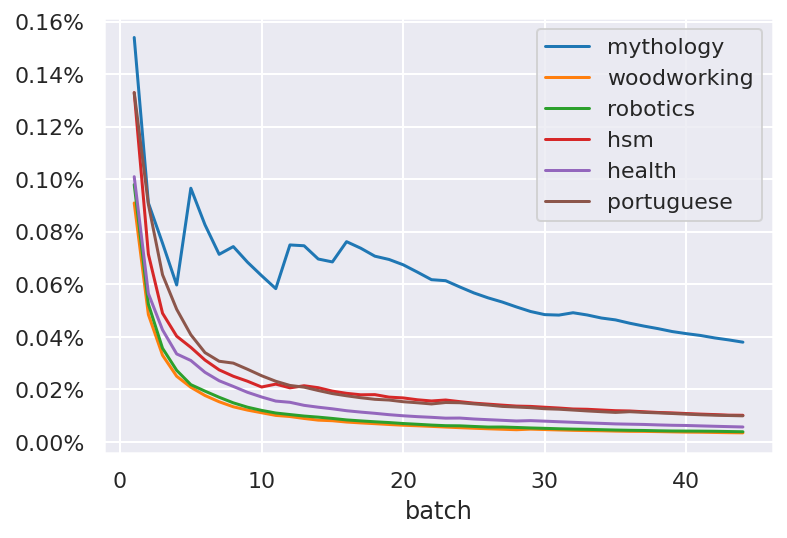

In [96]:
batches = np.arange(0, df.chars_n.min(), HOP)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
ax = batch_counters_freq_df.plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=2))
plt.show()

This plot illustrates the same idea from another point of view. As the number of batches considered increased the proportion of unique characters decrease considerably at the beginning. This is because while the number of batches increases the number of unique characters achieves similar values.

# Tokens and words

### tokenizing

In [97]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()

print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [98]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [99]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-t-il*, *Kaffeetasse*, *我爱你*...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

### Using a specialized class: `nltk`

In [100]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [101]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|tradução|correta|de|``|shipping|address|''|e|``|billing|address|''|para|o|português|europeu|?|As|seguintes|traduções|estão|corretas|no|português|europeu|?|Shipping|Address|-|>|Endereço|de|Envio|Billing|Address|-|>|Endereço|de|Faturamento|Qual|é|a|diferença|entre|``|Endereço|de|Envio|''|e|``|Endereço|de|Entrega|''|?|Qual|é|melhor|para|você|?


67

Watch out: do = de + o

In [102]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

In [103]:
tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [104]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["types_n"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nWhere did this story about stars being p...,3283.83,1684,3.59e-04,42,"[Q, :, Where, did, this, story, about, stars, ...",942611,51243
woodworking,2461,6729416,Q:\n\nTool recommendation to prick bamboo node...,2734.42,159,2.36e-05,54,"[Q, :, Tool, recommendation, to, prick, bamboo...",1390534,32316
robotics,2981,7254006,Q:\n\nControlling a conveyor belt with a time ...,2433.41,189,2.61e-05,40,"[Q, :, Controlling, a, conveyor, belt, with, a...",1526918,53823
hsm,2329,7364214,"Q:\n\nWhen did Mathematics stop being one of ""...",3161.96,524,7.12e-05,45,"[Q, :, When, did, Mathematics, stop, being, on...",1445136,62465
health,3412,9148631,Q:\n\nWhy doesn't the heart always pump at max...,2681.31,291,3.18e-05,44,"[Q, :, Why, does, n't, the, heart, always, pum...",1714930,66007
portuguese,1840,4415251,"Q:\n\nQual a tradução correta de ""shipping add...",2399.59,437,9.90e-05,48,"[Q, :, Qual, a, tradução, correta, de, ``, shi...",907253,60276


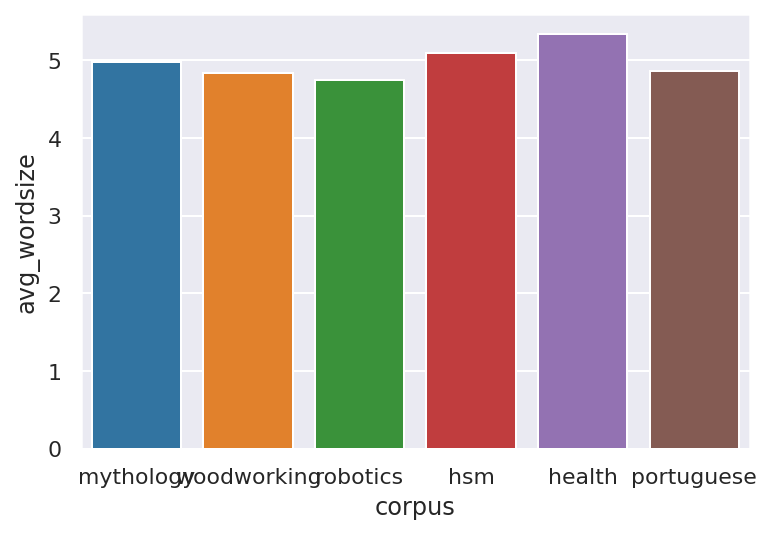

In [105]:
df["avg_wordsize"] = df.chars_n / df.tokens_n
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [106]:
word_ctr = Counter(df.tokens.mythology)
myth_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
myth_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_tok_freq_df.index.name = "token"
myth_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33184
of,29559
and,21018


In [107]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52199
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

In [108]:
def avg_len_tokens(toks, mode = 0):
    '''
    Function to calculate the average length of tokens in a list of tokens
    Args:
        toks: list of tokens
        mode: 0 for all tokens, 1 for unique tokens
    Returns:
        Average length of tokens in the list toks
    '''
    if mode != 0:
        toks = set(toks)
    
    sum_len = 0

    for token in toks:
        sum_len += len(token)
    
    return sum_len/len(toks)


def max_len_tokens(toks):
    '''
    Function to calculate the maximum length of a token in a list of tokens
    Args:
        toks: list of tokens
    Returns:    
        Maximum length of tokens in the list toks
    '''
    max_len = 0
    for token in toks:
        max_len = max(max_len, len(token))

    return max_len


def longest_words(toks):
    '''
    Function to calculate the longest word in a list of tokens
    Args:
        toks: list of tokens
    Returns:
        Longest word in the list toks
    '''
    max_len = 0
    token_max_len = ''
    for token in toks:
        if max_len < len(token):
            token_max_len = token
            max_len = len(token)

    return token_max_len

In [109]:
print("\n*** average length in the dictionary considering repeated tokens (on types) ***")
display(tokens.map(avg_len_tokens))
print("\n*** average length in the dictionary considering unique tokens (on types) ***")
display(tokens.map(lambda x: avg_len_tokens(x, 1)))


*** average length in the dictionary considering repeated tokens (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
Name: text, dtype: float64


*** average length in the dictionary considering unique tokens (on types) ***


corpus
mythology       7.72
woodworking     8.26
robotics        9.03
hsm             8.25
health         10.03
portuguese      7.98
Name: text, dtype: float64

In [110]:
print("\n*** the longest words' length ***")
display(tokens.map(max_len_tokens))

print("\n*** the longest words ***")
display(tokens.map(longest_words))


*** the longest words' length ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
Name: text, dtype: int64


*** the longest words ***


corpus
mythology      亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其...
woodworking    //www.hafele.com/us/en/products/furniture-kitc...
robotics       //helgewurdemann.files.wordpress.com/2014/10/e...
hsm            //www.quora.com/What-are-the-ways-to-understan...
health         //www.researchgate.net/profile/Secil_Vural/pub...
portuguese     //educacao.uol.com.br/disciplinas/cultura-bras...
Name: text, dtype: object

#### We can try to remove all non-ascii characters to get to actual long words

In [111]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
GraphussupportsMonica,1,21
halfdovetaillapjoints,1,21
AloysiusDefenestrate,1,20
CrazyRussianWoodShop,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
PopularWoodworking,1,18
disproportionately,1,18
GreatPlanesTrading,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [121]:
def len_freq_counter(text):
    '''
    Function to calculate the frequency of words of a certain length in a text
    Args:
        text: text to be analyzed
    Returns:
        Counter with the frequency of lengths of words in the text
    '''
    len_freq = Counter()
    for token in text:
        len_freq[len(token)] += 1
    
    return len_freq

#len_freq_df = 

#### 🚧 TODO: Let's plot the mythology word length distribution

In [119]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)
myth_len_freqs.head(5)

AttributeError: 'DataFrame' object has no attribute 'mythology'

In [ ]:
ax = myth_len_freqs.plot.bar(title="check the long tail!", linewidth=0)

# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)

plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

In [ ]:
myth_len_freqs.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freqs.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

In [ ]:
len_freq_df.mythology.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# 💥 Let's Zipf token frequencies!

In [ ]:
myth_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

In [ ]:
myth_tok_freq_df.plot(loglog=True)
plt.show()

In [ ]:
# len_freq_df.woodworking.sort_values(ascending=False).plot(loglog=True, style=".")
# plt.ylabel("frequency")
# plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

#### 🚧 TODO: Now let's process the length distribution for every corpus

In [ ]:
# all_token_freqs_df = ...

In [ ]:
# all_token_freqs_df.plot(loglog=True)
# plt.show()

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

In [ ]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)

myth_len_freqs.plot(title="That's strange!")
plt.show()

In [ ]:
myth_len_freqs.plot(title="That's strange!", loglog=True)
plt.show()

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

In [ ]:
# df["token_type_ratio"] = ...

### What happened to Portuguese? Explain!

Make a type/token ration growth plot. Explain the obtained order!

In [ ]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)

In [ ]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

word_type_df

### Percentage of new words

In [ ]:
# ...

# word_type_token_df.plot()
# plt.show()

# word_type_token_df

____